<html><head><meta content="text/html; charset=UTF-8" http-equiv="content-type"><style type="text/css">ol</style></head><body class="c5"><p class="c0 c4"><span class="c3"></span></p><p class="c2 title" id="h.rrbabt268i6e"><h1>CaImAn&rsquo;s Demo pipeline</h1></p><p class="c0"><span class="c3">This notebook will help to demonstrate the process of CaImAn and how it uses different functions to denoise, deconvolve and demix neurons from a Calcium Imaging Video. </span></p>
<p><img src="../../docs/img/quickintro.png" /></p>
<p class="c0"><span class="c3">More information can be found in CaImAn&rsquo;s documentation. </span></p>
</html>



In [1]:
#!/usr/bin/env python
from __future__ import division
from __future__ import print_function
from builtins import zip
from builtins import str
from builtins import map
from builtins import range
from past.utils import old_div

import matplotlib.pyplot as plt
import numpy as np
import os
import sys

try:
    get_ipython().magic(u'load_ext autoreload')
    get_ipython().magic(u'autoreload 2')    
except:
    print('Not IPYTHON')

get_ipython().magic(u'matplotlib qt')   
import caiman as cm
from caiman.source_extraction import cnmf
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr
from caiman.components_evaluation import estimate_components_quality_auto
from caiman.motion_correction import motion_correct_oneP_rigid
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
import cv2

try:
    cv2.setNumThreads(0)
except:
    pass
import bokeh.plotting as bpl
bpl.output_notebook()

Loading BokehJS ...

### Setup some parameters
many of them will be set directly calling the CNMF object

In [2]:
fnames = ['data_endoscope.tif']
frate = 10 # movie frame rate
gSig = 3   # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = 10  # average diameter of a neuron
do_motion_correction = True

Download the dataset if not already present

In [3]:
fnames = [download_demo(fnames[0])]

File already downloaded


### (Re)start cluster.  

In [4]:
try:
    dview.terminate() # stop it if it was running
except:
    pass

c, dview, n_processes = cm.cluster.setup_cluster(backend='local', # use this one
                                                 n_processes=24,  # number of process to use, if you go out of memory try to reduce this one
                                                 )

0
0
0
0
0
0
10
0
10
10
10
10
0
10
20
20
20
0
20
0
20
30
10
20
10
30
30
30
30
20
30
10
20
40
40
40
40
30
40
10
40
50
30
50
20
50
50
50
40
20
60
50
40
60
60
30
60
70
30
60
60
70
50
80
70
40
50
70
80
90
40
80
70
50
70
60
60
90
90
50
80
80
60
70
80
70
90
90
60
80
90
80
70
90
70
90
80
80
90
90
(1000, 81, 80)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
(1000, 81, 81)
(1000, 80, 81)
using 1 processes
using 1 processes
using 1600 pixels per process
using 1600 pixels per process
using 5000 block_size
using 5000 block_size
preprocessing ...
preprocessing ...
checking if missing data
checking if missing data
(1000, 80, 80)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
initializing ...
initializing ...
Spatial Downsampling 1-photon
initializing ...
Spatial Downsampling 1-photon
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initializat

/opt/local/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


19 out of total 20 temporal components updated
18 out of total 22 temporal components updated
16 out of total 19 temporal components updated
20 out of total 20 temporal components updated
18 out of total 19 temporal components updated
21 out of total 22 temporal components updated
19 out of total 19 temporal components updated
stopping: overall temporal component not changing significantly
22 out of total 22 temporal components updated
Update Spatial
Initializing update of Spatial Components
computing the distance indicators


/opt/local/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


9 out of total 20 temporal components updated
12 out of total 20 temporal components updated
10 out of total 22 temporal components updated
15 out of total 20 temporal components updated
19 out of total 20 temporal components updated
18 out of total 22 temporal components updated
20 out of total 20 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
21 out of total 22 temporal components updated


/opt/local/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


22 out of total 22 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators


/opt/local/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


memmaping
Updating Spatial Components using lasso lars
memmaping
Updating Spatial Components using lasso lars
memmaping
Updating Spatial Components using lasso lars
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 1.3827507495880127 seconds ---
Removing tempfiles created
Merge Components
No neurons merged!
Compute Background Again
thresholding components
Computing residuals
--- 1.4536170959472656 seconds ---
thresholding components
Removing tempfiles created
Merge Components
Computing residuals
--- 1.4334125518798828 seconds ---
Removing tempfiles created
Merge Components
No neurons merged!
Compute Background Again
No neurons merged!
Compute Background Again
Update Temporal
Generating residuals
Update Temporal
Update Temporal
entering the deconvolution 
8 out of total 17 temporal components updated
Generating residuals
thresholding components
Generating residuals
14 out of total 17 temporal components updated
17 out of total 17 temp

### Creation of a memory mappable file. 
    - Performs motion correction and simultaneously creates a memory mappable file in F order
    - Transforms into C order (much more efficient for parallel processing
    - If you have multiple files there are ways to process many at the same time (not shown)
    

Rigid Motion Correction
5.3534
-1.69973516464
Frame 100
cubic interpolation
Frame 100
-1.69973516464
Frame 100
cubic interpolation


/mnt/home/agiovann/SOFTWARE/CaImAn/caiman/base/movies.py:263: UserWarning: ** Pixels averages are too negative. Removing 1 percentile. **
  '** Pixels averages are too negative. Removing 1 percentile. **')
/mnt/home/agiovann/SOFTWARE/CaImAn/caiman/base/movies.py:282: UserWarning: Pixels averages are too negative for template. Removing 1 percentile.
  'Pixels averages are too negative for template. Removing 1 percentile.')


Frame 100
-1.69973516464
Frame 100
cubic interpolation
Frame 100
Adding to movie 5.3534
0
saving!
** Startting parallel motion correction **


100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

** Finished parallel motion correction **
0.0454751
loading in memory
mmap


SAVING WITH f.write()


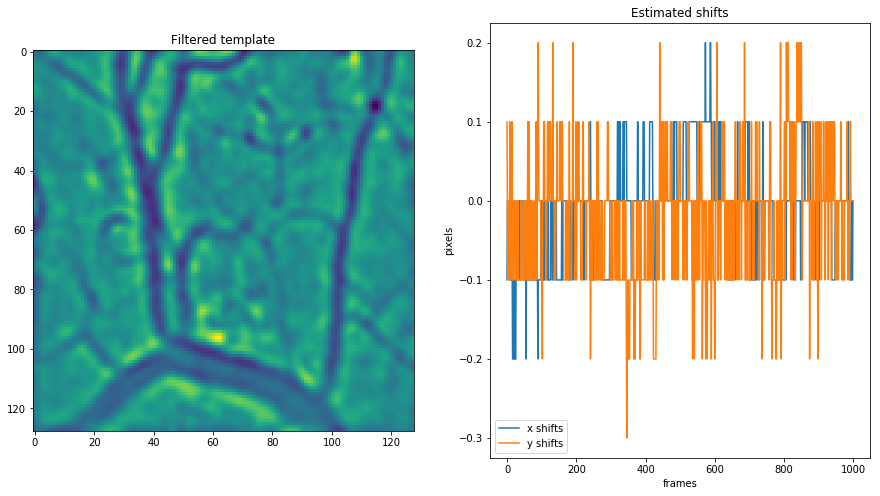

In [5]:
if do_motion_correction:
    mc = motion_correct_oneP_rigid(fnames,                        # name of file to motion correct
                               gSig_filt = [gSig]*2,                 # size of filter, xhange this one if algorithm does not work 
                               max_shifts = [5,5],                   # maximum shifts allowed in each direction 
                               dview=dview, 
                               splits_rig = 10,                      # number of chunks for parallelizing motion correction (remember that it should hold that length_movie/num_splits_to_process_rig>100) 
                               save_movie = True)                    # whether to save movie in memory mapped format
    
    new_templ = mc.total_template_rig
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)    
    plt.title('Filtered template')
    plt.imshow(new_templ)       #% plot template
    plt.subplot(1,2,2)
    plt.title('Estimated shifts')
    plt.plot(mc.shifts_rig)     #% plot rigid shifts
    plt.legend(['x shifts', 'y shifts'])
    plt.xlabel('frames')
    plt.ylabel('pixels')
    
    bord_px_rig = np.ceil(np.max(mc.shifts_rig)).astype(np.int)     #borders to eliminate from movie because of motion correction        
    fname_new = cm.save_memmap([mc.fname_tot_rig], base_name='memmap_', order = 'C') # transforming memoruy mapped file in C order (efficient to perform computing)
else:
    #% create memory mappable file
    fname_new = cm.save_memmap(fnames, base_name='memmap_', order = 'C')

# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
Y = Yr.T.reshape((T,) + dims, order='F')

Play the movie (optional). This will require loading the movie in memory which in general is not needed by the pipeline. Displaying the movie uses the OpenCV library. Press `q` to close the video panel. **BEWARE** the movie may appear in the background!

In [6]:
m_orig = cm.movie(Y)
downsample_ratio = 1.
offset_mov = -np.min(m_orig[:100])  # make the dataset mostly non-negative
m_orig.resize(1, 1, downsample_ratio).play(
gain=2, offset=offset_mov, fr=30, magnification=2)

### Inspect summary images and set parameters
Check the optimal values of min_corr and min_pnr by moving slider in the figure that pops up

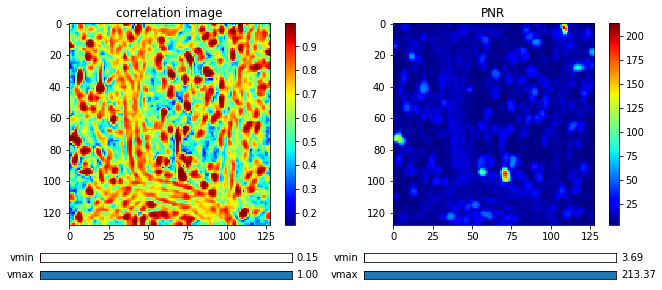

In [7]:
# compute some summary images (correlation and peak to noise)
cn_filter, pnr = cm.summary_images.correlation_pnr(Y, gSig=gSig, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
# inspect the summary images and set the parameters
inspect_correlation_pnr(cn_filter,pnr)


In [8]:

min_corr = .8 # min correlation of peak (from correlation image)
min_pnr = 10 # min peak to noise ratio
min_SNR = 3 # adaptive way to set threshold on the transient size
r_values_min = 0.85  # threshold on space consistency (if you lower more components will be accepted, potentially with worst quality)
decay_time = 0.4  #decay time of transients/indocator

In [9]:
### Set CNMF parameters and run it

In [10]:
cnm = cnmf.CNMF(n_processes=n_processes, 
                method_init='corr_pnr',                 # use this for 1 photon
                k=70,                                   # neurons per patch
                gSig=(3, 3),                            # half size of neuron
                gSiz=(10, 10),                          # in general 3*gSig+1
                merge_thresh=.8,                        # threshold for merging
                p=1,                                    # order of autoregressive process to fit
                dview=dview,                            # if None it will run on a single thread
                tsub=2,                                 # downsampling factor in time for initialization, increase if you have memory problems             
                ssub=2,                                 # downsampling factor in space for initialization, increase if you have memory problems
                Ain=None,                               # if you want to initialize with some preselcted components you can pass them here as boolean vectors
                rf=(40, 40),                            # half size of the patch (final patch will be 100x100)
                stride=(20, 20),                        # overlap among patches (keep it at least large as 4 times the neuron size)
                only_init_patch=True,                   # just leave it as is
                gnb=16,                                 # number of background components
                nb_patch=16,                            # number of background components per patch
                method_deconvolution='oasis',           #could use 'cvxpy' alternatively
                low_rank_background=True,               #leave as is
                update_background_components=True,      # sometimes setting to False improve the results
                min_corr=min_corr,                      # min peak value from correlation image 
                min_pnr=min_pnr,                        # min peak to noise ration from PNR image
                normalize_init=False,                   # just leave as is
                center_psf=True,                        # leave as is for 1 photon
                del_duplicates=True)                    # whether to remove duplicates from initialization

cnm.fit(Y)

(1000, 128, 128)
using 24 processes
using 4000 pixels per process
using 5000 block_size
(80, 80)
9.38476037979126
Transforming patches into full matrix
Skipped %d Empty Patch 0
Generating background
Compressing background components with a low rank NMF
Generating background DONE
merging
No neurons merged!
update temporal
Generating residuals
parallel dot product block size: 5000
Start product


/opt/local/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


Processed:[0, 4]
Transposing
entering the deconvolution 
19 out of total 51 temporal components updated
35 out of total 51 temporal components updated
44 out of total 51 temporal components updated
48 out of total 51 temporal components updated
50 out of total 51 temporal components updated
51 out of total 51 temporal components updated
stopping: overall temporal component not changing significantly
update spatial ...
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
parallel dot product block size: 5000
Start product
Processed:[0, 4]
Filling
--- 10.76667308807373 seconds ---
Removing tempfiles created
update temporal
Generating residuals
parallel dot product block size: 5000
Start product
Processed:[0, 4]
Transposing
entering the deconvolution 
19 out of total 51 temporal components updated
33 out of total 51 temporal components updated
42 out of total 51 tempor

plot contours of identified components against correlation image

/mnt/home/agiovann/SOFTWARE/CaImAn/caiman/utils/visualization.py:944: UserWarning: The way to call utilities.plot_contours has changed. Look at the definition for more details.
  warn("The way to call utilities.plot_contours has changed. Look at the definition for more details.")


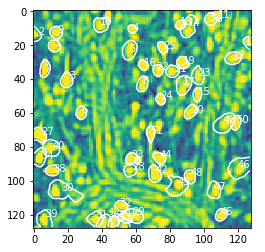

In [11]:
crd = cm.utils.visualization.plot_contours(cnm.A, cn_filter, thr=.8, vmax=0.95)

## Component Evaluation

The processing in patches creates several spurious components. These are filtered out by evaluating each component using three different criteria:

- the shape of each component must be correlated with the data at the corresponding location within the FOV
- a minimum peak SNR is required over the length of a transient
- each shape passes a CNN based classifier

<img src="../../docs/img/evaluationcomponent.png"/>

In [12]:
#%% COMPONENT EVALUATION
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier

idx_components, idx_components_bad, comp_SNR, r_values, pred_CNN = estimate_components_quality_auto(
                            Y, cnm.A, cnm.C, cnm.b, cnm.f, cnm.YrA, frate, 
                            decay_time, gSig, dims, dview = dview, 
                            min_SNR=min_SNR, r_values_min = r_values_min, min_std_reject = 0.5, use_cnn = False)

print(' ***** ')
print((len(cnm.C)))
print((len(idx_components)))
print(r_values[idx_components_bad])

EVALUATING IN PARALLEL... NOT RETURNING ERFCs
 ***** 
51
50
[-0.28292678]


Plot contours of selected and rejected components

/mnt/home/agiovann/SOFTWARE/CaImAn/caiman/utils/visualization.py:944: UserWarning: The way to call utilities.plot_contours has changed. Look at the definition for more details.
  warn("The way to call utilities.plot_contours has changed. Look at the definition for more details.")


Text(0.5,1,'Contour plots of rejected components')

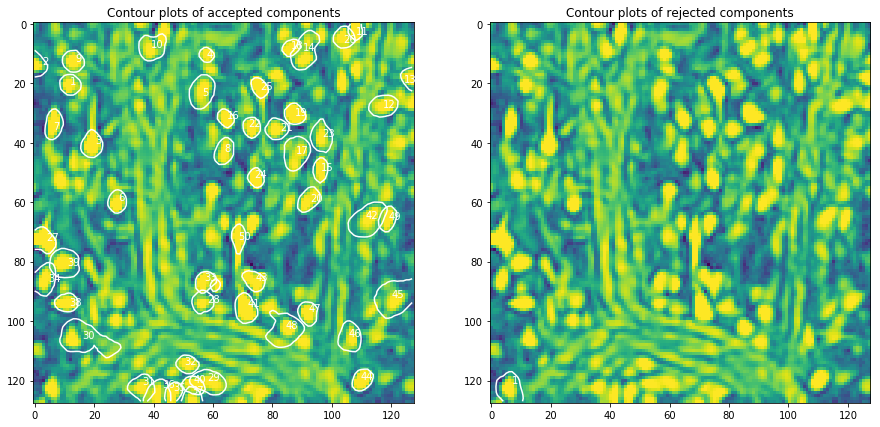

In [13]:
#%% PLOT COMPONENTS

plt.figure(figsize=(15,8));
plt.subplot(121);
crd = cm.utils.visualization.plot_contours(cnm.A.tocsc()[:,idx_components], cn_filter, thr=.8, vmax=0.95)
plt.title('Contour plots of accepted components')
plt.subplot(122); 
crd = cm.utils.visualization.plot_contours(cnm.A.tocsc()[:,idx_components_bad], cn_filter, thr=.8, vmax=0.95)
plt.title('Contour plots of rejected components')

View traces of accepted and rejected components. Note that if you get data rate error you can start Jupyter notebooks using:
'jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10'

In [14]:
# accepted components
nb_view_patches(Yr, cnm.A.tocsc()[:, idx_components], cnm.C[idx_components], 
                cnm.b, cnm.f, dims[0], dims[1], YrA=cnm.YrA[idx_components], image_neurons = cn_filter,
                denoised_color = 'red', thr=0.8, cmap='gray');

In [15]:
# rejected components
nb_view_patches(Yr, cnm.A.tocsc()[:, idx_components_bad], cnm.C[idx_components_bad], 
                cnm.b, cnm.f, dims[0], dims[1], YrA=cnm.YrA[idx_components_bad], image_neurons = cn_filter,
                denoised_color = 'red', thr=0.8, cmap='gray');

### Stop cluster

In [16]:
#%%
cm.stop_server(dview=dview)

 done


### Some instructive movies

In [17]:
#%% denoised movie
cm.movie(np.reshape(cnm.A.tocsc()[:,idx_components].dot(cnm.C[idx_components])+cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=3, gain = 1.)

In [18]:
#%% only neurons
cm.movie(np.reshape(cnm.A.tocsc()[:,idx_components].dot(cnm.C[idx_components]),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=3, gain = 10.)

In [ ]:
#%% only the background
cm.movie(np.reshape(cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=3, gain = 1.)

In [ ]:
#%% residuals
cm.movie(np.array(Y)-np.reshape(cnm.A.tocsc()[:,:].dot(cnm.C[:])+cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=3, gain = 10., fr = 10)


In [ ]:
#%% eventually, you can rerun the algorithm on the residuals
plt.imshow(cm.movie(np.array(Y)-np.reshape(cnm.A.tocsc()[:,:].dot(cnm.C[:])+cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).local_correlations(swap_dim=False))